In [1]:
import os
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import numpy as np

In [1]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc("font", **font)

path = "PPO_data/" # "A0_data/" # 

runs = []
for file in os.listdir(path=os.path.join(os.getcwd(), path)):
				if file.endswith(".csv"):
								data = np.genfromtxt(os.path.join(os.getcwd(), path, file), delimiter=",", skip_header=1)
								num_samples = data[:1500, 0]*32*85
								num_muls = data[:1500, 1]
								print(file, num_muls.shape)
								runs.append(num_muls)

data = jnp.stack(runs, axis=0)

data_mean = jnp.mean(data, axis=0)
data_max = jnp.max(data, axis=0)
data_min	= jnp.min(data, axis=0)
data_err = jnp.stack([data_min, data_max], axis=0)


fig, ax = plt.subplots()
ax.plot(num_samples, data_mean, label="Our work")
ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
ax.axhline(y=-938., color="r", linestyle="--", label="SOTA for RoeFlux_3d")
ax.annotate("938", (num_samples[0], -938), textcoords="offset points", xytext=(4, 5), ha="center", color="red")
ax.set_xlabel("# samples")
ax.set_ylabel("return (# multiplications)")
ax.set_title("AD algorithm optimization RoeFlux_3d")

ticks = ax.get_yticks()
labels = ax.get_yticklabels()
labels = [str(int(-t)) for t in ticks]
ax.set_yticklabels(labels)

ax.legend(loc="lower right")

NameError: name 'plt' is not defined

In [2]:
from graphax.perf import plot_performance
from graphax.examples import RoeFlux_3d

In [3]:
# 811 mults
order = [124, 136, 56, 128, 78, 24, 1, 54, 101, 127, 121, 140, 47, 135, 67, 34, 
         111, 32, 100, 119, 99, 114, 125, 141, 122, 45, 65, 59, 117, 89, 116, 
         60, 42, 28, 74, 85, 11, 53, 36, 30, 108, 113, 55, 109, 129, 64, 91, 
         14, 133, 5, 10, 132, 87, 139, 110, 12, 131, 72, 8, 61, 88, 107, 6, 29, 
         57, 96, 118, 105, 71, 77, 112, 66, 75, 84, 143, 123, 90, 94, 137, 104, 
         69, 23, 22, 62, 58, 50, 130, 31, 106, 39, 48, 49, 98, 134, 93, 138, 
         126, 68, 115, 80, 102, 92, 79, 52, 16, 120, 95, 76, 19, 25, 73, 21, 70, 
         38, 35, 20, 86, 41, 4, 103, 43, 27, 3, 40, 9, 83, 13, 18, 37, 51, 46, 
         7, 81, 97, 63, 44, 2, 33, 82, 26, 15, 17, 145] 

# order = [133, 51, 137, 54, 45, 120, 2, 127, 9, 42, 68, 102, 27, 131, 16, 10, 35, 7, 12, 145, 83, 113, 64, 55, 84, 143, 75, 132, 111, 85, 110, 13, 100, 119, 92, 53, 121, 74, 101, 125, 139, 73, 71, 30, 138, 21, 136, 105, 88, 29, 104, 37, 109, 114, 56, 96, 14, 118, 126, 20, 58, 141, 123, 112, 107, 135, 134, 129, 22, 128, 41, 52, 78, 57, 47, 11, 38, 77, 39, 19, 116, 15, 91, 70, 99, 66, 67, 106, 76, 81, 62, 40, 80, 60, 82, 6, 25, 33, 32, 69, 103, 79, 4, 28, 117, 5, 49, 98, 48, 93, 65, 124, 86, 61, 108, 122, 87, 115, 8, 94, 97, 50, 72, 89, 43, 90, 130, 3, 18, 46, 95, 140, 36, 1, 59, 34, 44, 31, 17, 63, 26, 24, 23]
mM_order = [81, 82, 90, 91, 4, 5, 9, 10, 12, 14, 21, 22, 23, 24, 30, 31, 32, 33, 
            39, 41, 45, 47, 48, 54, 55, 59, 75, 78, 80, 84, 89, 93, 126, 129, 
            132, 133, 3, 6, 25, 28, 34, 37, 40, 42, 49, 56, 58, 62, 64, 65, 67, 
            71, 74, 77, 85, 87, 94, 96, 98, 99, 100, 101, 102, 104, 105, 107, 
            109, 110, 112, 114, 116, 117, 119, 121, 123, 125, 127, 130, 134, 
            136, 138, 26, 29, 35, 38, 46, 57, 61, 68, 72, 83, 88, 92, 97, 111, 
            118, 124, 131, 137, 141, 11, 19, 20, 50, 53, 60, 70, 103, 106, 113, 
            120, 135, 86, 95, 13, 15, 43, 52, 66, 128, 145, 69, 73, 18, 139, 27, 
            36, 140, 108, 122, 115, 1, 51, 76, 79, 63, 2, 44, 16, 7, 8, 143, 17] 

In [5]:
from graphax.perf import measure

shape = (512,)
batchsize = 512
ul0 = jnp.array([.1])
ul = jnp.array([.1, .2, .3])
ul4 = jnp.array([.5])
ur0 = jnp.array([.2])
ur = jnp.array([.2, .2, .4])
ur4 = jnp.array([.6])
xs = (ul0, ul, ul4, ur0, ur, ur4)
xs = [jnp.tile(x[jnp.newaxis, ...], (batchsize, 1)) for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
_, median, error = measure(RoeFlux_3d, xs, samplesize=1000)
median, error

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 3967.31it/s]


(Array(0.01907907, dtype=float32),
 Array([-0.00033015,  0.00154948], dtype=float32))

In [4]:
batchsize = 512
ul0 = jnp.array([.1])
ul = jnp.array([.1, .2, .3])
ul4 = jnp.array([.5])
ur0 = jnp.array([.2])
ur = jnp.array([.2, .2, .4])
ur4 = jnp.array([.6])
xs = (ul0, ul, ul4, ur0, ur, ur4)
xs = [jnp.tile(x[jnp.newaxis, ...], (batchsize, 1)) for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
jax.vmap(RoeFlux_3d)(*xs)

(Array([[0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0

In [5]:
plot_performance(RoeFlux_3d, xs, order, mM_order, "./RoeFlux_3d.png", samplesize=1000, use_vmap=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

TypeError: mul got incompatible shapes for broadcasting: (512, 1, 512, 1), (512, 1, 3, 3).

[(16, 1), (16, 3), (16, 1), (16, 1), (16, 3), (16, 1)]


  0%|          | 0/110 [00:00<?, ?it/s]

Post: SparseTensor(
   shape = (16,1|16,1),
   out_dims = (SparseDimension(id=0, size=16, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=16, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[16,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Pre: SparseTensor(
   shape = (16,1|16,1),
   out_dims = (SparseDimension(id=0, size=16, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=16, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[16,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Post: SparseTensor(
   shape = (16,1|16,1),
   out_dims = (SparseDimension(id=0, size=16, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_d

  0%|          | 0/110 [00:00<?, ?it/s]

Post: SparseTensor(
   shape = (64,1|64,1),
   out_dims = (SparseDimension(id=0, size=64, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=64, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[64,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Pre: SparseTensor(
   shape = (64,1|64,1),
   out_dims = (SparseDimension(id=0, size=64, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=64, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[64,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Post: SparseTensor(
   shape = (64,1|64,1),
   out_dims = (SparseDimension(id=0, size=64, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_d

  0%|          | 0/110 [00:00<?, ?it/s]

Post: SparseTensor(
   shape = (256,1|256,1),
   out_dims = (SparseDimension(id=0, size=256, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=256, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[256,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Pre: SparseTensor(
   shape = (256,1|256,1),
   out_dims = (SparseDimension(id=0, size=256, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=256, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[256,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Post: SparseTensor(
   shape = (256,1|256,1),
   out_dims = (SparseDimension(id=0, size=256, val_dim=0, other_id=2), SparseDimension(id=1, 

  0%|          | 0/110 [00:00<?, ?it/s]

Post: SparseTensor(
   shape = (512,1|512,1),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=512, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[512,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Pre: SparseTensor(
   shape = (512,1|512,1),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=512, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[512,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Post: SparseTensor(
   shape = (512,1|512,1),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=2), SparseDimension(id=1, 

  0%|          | 0/110 [00:00<?, ?it/s]

Post: SparseTensor(
   shape = (1024,1|1024,1),
   out_dims = (SparseDimension(id=0, size=1024, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=1024, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[1024,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Pre: SparseTensor(
   shape = (1024,1|1024,1),
   out_dims = (SparseDimension(id=0, size=1024, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=1024, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[1024,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Post: SparseTensor(
   shape = (1024,1|1024,1),
   out_dims = (SparseDimension(id=0, size=1024, val_dim=0, other_id=2), SparseDim

  0%|          | 0/110 [00:00<?, ?it/s]

Post: SparseTensor(
   shape = (2048,1|2048,1),
   out_dims = (SparseDimension(id=0, size=2048, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=2048, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[2048,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Pre: SparseTensor(
   shape = (2048,1|2048,1),
   out_dims = (SparseDimension(id=0, size=2048, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=2048, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[2048,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = [],
   post_transforms = [])

Post: SparseTensor(
   shape = (2048,1|2048,1),
   out_dims = (SparseDimension(id=0, size=2048, val_dim=0, other_id=2), SparseDim

100%|██████████| 110/110 [01:27<00:00,  1.26it/s]


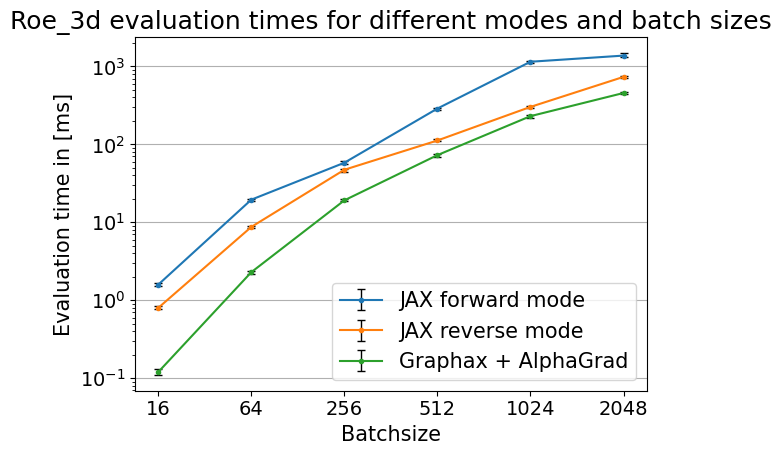

In [5]:
from graphax.perf import plot_performance_over_size_jax

shapes = (16, 64, 256, 512, 1024, 2048)
ul0 = jnp.array([.1])
ul = jnp.array([.1, .2, .3])
ul4 = jnp.array([.5])
ur0 = jnp.array([.2])
ur = jnp.array([.2, .2, .4])
ur4 = jnp.array([.6])
xs = (ul0, ul, ul4, ur0, ur, ur4)
xs = [[jnp.tile(x[jnp.newaxis, ...], (shape, 1)) for x in xs] for shape in shapes]
print([x.shape for x in xs[0]])
xs = jax.device_put(xs, jax.devices("cpu")[0])

plot_performance_over_size_jax(RoeFlux_3d, xs, order, "Roe_3d", ticks=shapes, samplesize=110)